# Gaussian RBF Kernel

In [19]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.datasets import make_classification, make_blobs, make_moons
from matplotlib import style
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 6)
style.use('ggplot')

In [20]:
X, y = make_moons(n_samples=2000, noise=0.1)

In [21]:
X[0:10]

array([[-0.01753917,  0.94863465],
       [ 1.61575709, -0.21501105],
       [ 1.67695968, -0.29093568],
       [ 1.70617664, -0.19917232],
       [-1.27354144,  0.65417675],
       [ 1.33509256, -0.34458728],
       [-0.65605209,  0.60212562],
       [ 1.79711074,  0.04508988],
       [ 1.2845118 , -0.50664145],
       [ 0.2365026 , -0.09837797]])

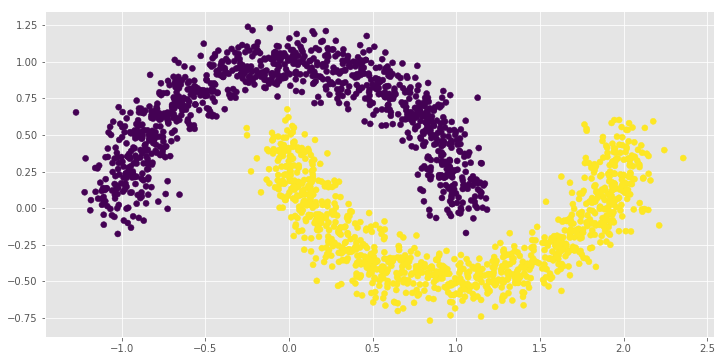

In [22]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [23]:
# Auto gamma equals 1/n_features
def draw_svm(X, y, C=1.0, gamma='auto'):
    plt.scatter(X[:,0], X[:,1], c=y)
    clf = SVC(kernel='rbf', C=C, gamma=gamma)
    clf_fit = clf.fit(X, y)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 200)
    yy = np.linspace(ylim[0], ylim[1], 200)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], 
                        alpha=0.5, linestyles=['--', '-', '--'])
    ax.scatter(clf.support_vectors_[:, 0], 
                clf.support_vectors_[:, 1], 
                s=100, linewidth=1, facecolors='none')
    plt.show()
    return clf_fit

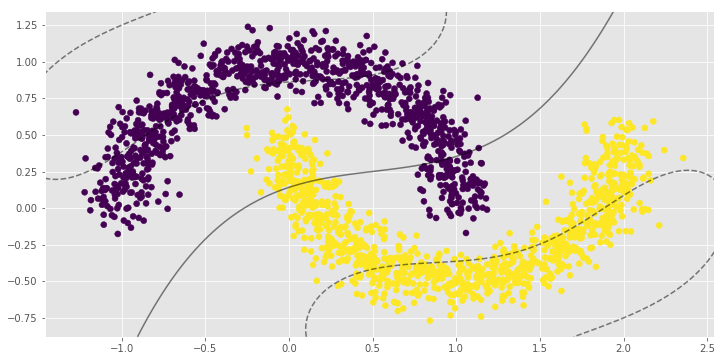

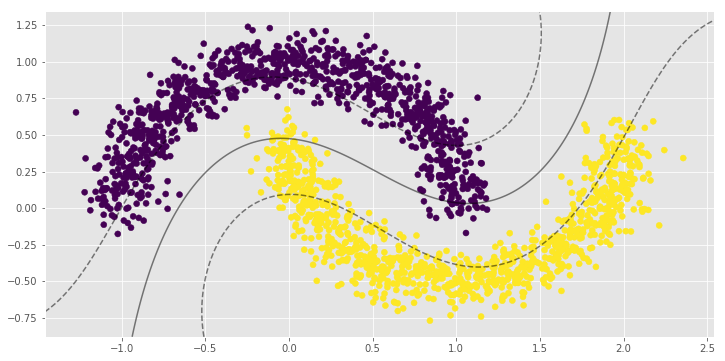

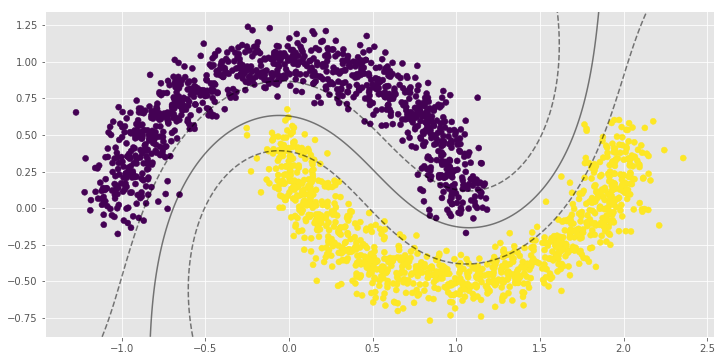

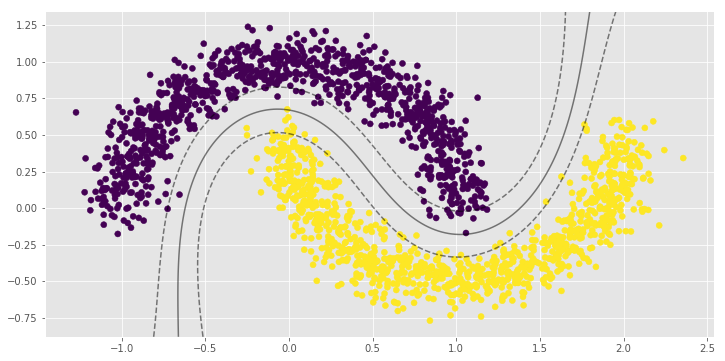

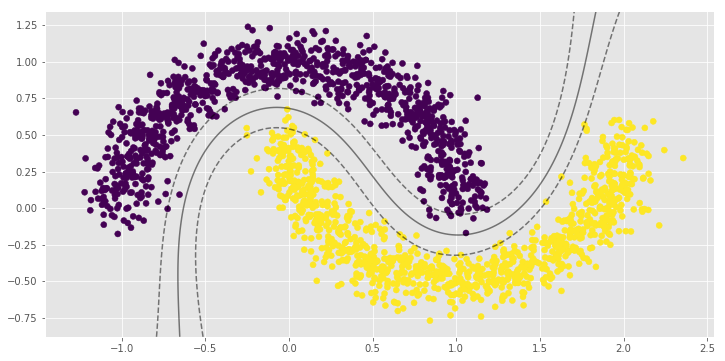

0.8875
0.981
0.9985
0.9995
1.0


In [24]:
clf_arr = []
clf_arr.append(draw_svm(X, y, 0.01))
clf_arr.append(draw_svm(X, y, 0.1))
clf_arr.append(draw_svm(X, y, 1))
clf_arr.append(draw_svm(X, y, 10))
clf_arr.append(draw_svm(X, y, 20))

for i, clf in enumerate(clf_arr):
    print(clf.score(X, y))